In [33]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [34]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

# DATA VISUALIZATION

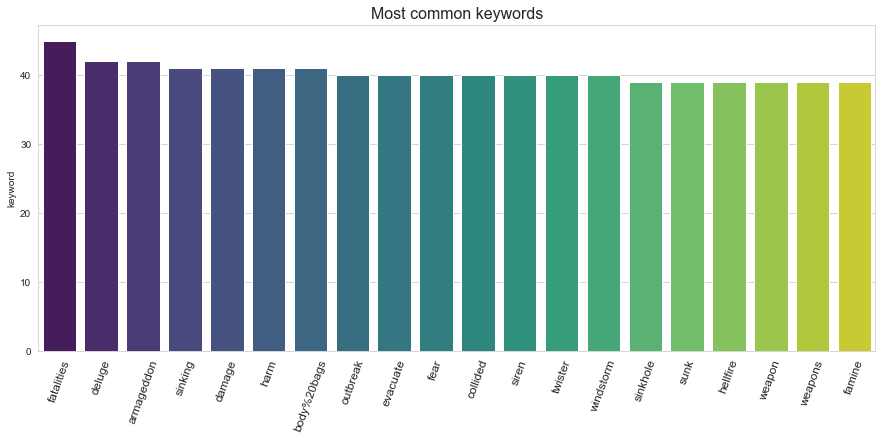

In [35]:
common_keywords=train["keyword"].value_counts()[:20].to_frame()
fig=plt.figure(figsize=(15,6))
sns.barplot(data=common_keywords,x=common_keywords.index,y="keyword",palette="viridis")
plt.title("Most common keywords",size=16)
plt.xticks(rotation=70,size=12);

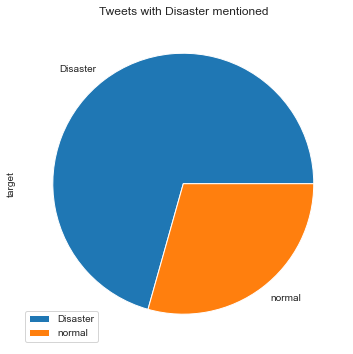

In [36]:
train[train.text.str.contains("disaster")].target.\
 value_counts().to_frame().rename(index={1:"Disaster",0:"normal"}).\
  plot.pie(y="target",figsize=(12,6),title="Tweets with Disaster mentioned");

In [37]:
train.location.value_counts()[:10].to_frame()

,location
USA,104
New York,71
United States,50
London,45
Canada,29
Nigeria,28
UK,27
"Los Angeles, CA",26
India,24
Mumbai,22


# WORD CLOUD OF TWEETS

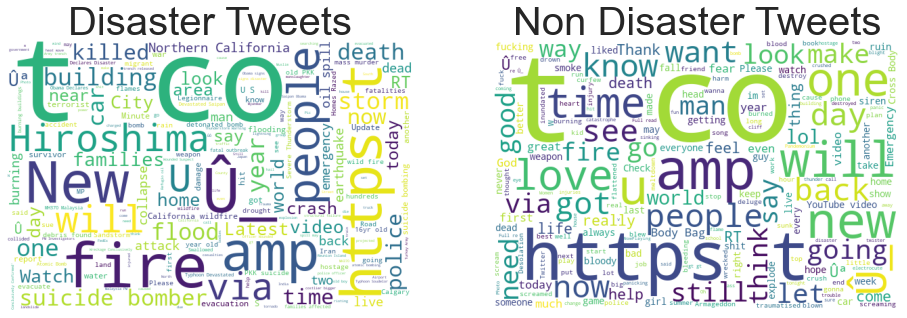

In [38]:
disaster_tweets = train[train['target']==1]['text']
non_disaster_tweets = train[train['target']==0]['text']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[16, 8])
wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(disaster_tweets))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Disaster Tweets',fontsize=40);

wordcloud2 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(non_disaster_tweets))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Non Disaster Tweets',fontsize=40);

In [39]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


# TEXT CLEANING

In [40]:
# lowering the text
train.text=train.text.apply(lambda x:x.lower() )
test.text=test.text.apply(lambda x:x.lower())
#removing square brackets
train.text=train.text.apply(lambda x:re.sub('\[.*?\]', '', x) )
test.text=test.text.apply(lambda x:re.sub('\[.*?\]', '', x) )
train.text=train.text.apply(lambda x:re.sub('<.*?>+', '', x) )
test.text=test.text.apply(lambda x:re.sub('<.*?>+', '', x) )
#removing hyperlink
train.text=train.text.apply(lambda x:re.sub('https?://\S+|www\.\S+', '', x) )
test.text=test.text.apply(lambda x:re.sub('https?://\S+|www\.\S+', '', x) )
#removing puncuation
train.text=train.text.apply(lambda x:re.sub('[%s]' % re.escape(string.punctuation), '', x) )
test.text=test.text.apply(lambda x:re.sub('[%s]' % re.escape(string.punctuation), '', x) )
train.text=train.text.apply(lambda x:re.sub('\n' , '', x) )
test.text=test.text.apply(lambda x:re.sub('\n', '', x) )
#remove words containing numbers
train.text=train.text.apply(lambda x:re.sub('\w*\d\w*' , '', x) )
test.text=test.text.apply(lambda x:re.sub('\w*\d\w*', '', x) )

train.text.head()

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3     people receive wildfires evacuation orders in...
4    just got sent this photo from ruby alaska as s...
Name: text, dtype: object

# TOKENIZATION

In [41]:
token=nltk.tokenize.RegexpTokenizer(r'\w+')
train.text=train.text.apply(lambda x:token.tokenize(x))
test.text=test.text.apply(lambda x:token.tokenize(x))
display(train.text.head())

0    [our, deeds, are, the, reason, of, this, earth...
1        [forest, fire, near, la, ronge, sask, canada]
2    [all, residents, asked, to, shelter, in, place...
3    [people, receive, wildfires, evacuation, order...
4    [just, got, sent, this, photo, from, ruby, ala...
Name: text, dtype: object

In [42]:
nltk.download('stopwords')
train.text=train.text.apply(lambda x:[w for w in x if w not in stopwords.words('english')])
test.text=test.text.apply(lambda x:[w for w in x if w not in stopwords.words('english')])
train.text.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    [deeds, reason, earthquake, may, allah, forgiv...
1        [forest, fire, near, la, ronge, sask, canada]
2    [residents, asked, shelter, place, notified, o...
3    [people, receive, wildfires, evacuation, order...
4    [got, sent, photo, ruby, alaska, smoke, wildfi...
Name: text, dtype: object

In [43]:
test.text.head()

0                     [happened, terrible, car, crash]
1    [heard, earthquake, different, cities, stay, s...
2    [forest, fire, spot, pond, geese, fleeing, acr...
3           [apocalypse, lighting, spokane, wildfires]
4            [typhoon, soudelor, kills, china, taiwan]
Name: text, dtype: object

# STEMMING 

In [44]:
stemmer = nltk.stem.PorterStemmer()
train.text=train.text.apply(lambda x:" ".join(stemmer.stem(token) for token in x))
test.text=test.text.apply(lambda x:" ".join(stemmer.stem(token) for token in x))
train.text.head()

0            deed reason earthquak may allah forgiv us
1                 forest fire near la rong sask canada
2    resid ask shelter place notifi offic evacu she...
3          peopl receiv wildfir evacu order california
4    got sent photo rubi alaska smoke wildfir pour ...
Name: text, dtype: object

# SPLITING INTO TEST AND TRAIN

In [45]:
X = train.text
y = train.target

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=1)

# VECTORIZE TEXT

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

train_x_vectors = vectorizer.fit_transform(train_x)
test_x_vectors = vectorizer.transform(test_x)

# MODELS

In [47]:
from sklearn.metrics import accuracy_score

# Linear SVC

In [48]:
from sklearn.svm import LinearSVC
model = LinearSVC()
model.fit(train_x_vectors, train_y)
model_pred = model.predict(test_x_vectors)
model_acc_lsvc = accuracy_score(model_pred, test_y)
print(f'Accuracy Score: {model_acc_lsvc}')

Accuracy Score: 0.7746848739495799


# Support Vector Machine

In [49]:
from sklearn.svm import SVC
model = SVC()
model.fit(train_x_vectors, train_y)
model_pred = model.predict(test_x_vectors)
model_acc_svc = accuracy_score(model_pred, test_y)
print(f'Accuracy Score: {model_acc_svc}')

Accuracy Score: 0.8019957983193278


# Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(train_x_vectors, train_y)
model_pred = model.predict(test_x_vectors)
model_acc_rf = accuracy_score(model_pred, test_y)
print(f'Accuracy Score: {model_acc_rf}')

Accuracy Score: 0.7899159663865546


# Decision Tree Classifier

In [51]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(train_x_vectors, train_y)
model_pred = model.predict(test_x_vectors)
model_acc_df = accuracy_score(model_pred, test_y)
print(f'Accuracy Score: {model_acc_df}')

Accuracy Score: 0.7505252100840336


# K-NN

In [52]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(train_x_vectors, train_y)
model_pred = model.predict(test_x_vectors)
model_acc_knn = accuracy_score(model_pred, test_y)
print(f'Accuracy Score: {model_acc_knn}')

Accuracy Score: 0.6990546218487395


# Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(train_x_vectors, train_y)
model_pred = model.predict(test_x_vectors)
model_acc_lr = accuracy_score(model_pred, test_y)
print(f'Accuracy Score: {model_acc_lr}')

Accuracy Score: 0.803046218487395


# Naive Bayes

In [54]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(train_x_vectors, train_y)
model.fit(train_x_vectors, train_y)
model_pred = model.predict(test_x_vectors)
model_acc_nb = accuracy_score(model_pred, test_y)
print(f'Accuracy Score: {model_acc_nb}')

Accuracy Score: 0.7988445378151261


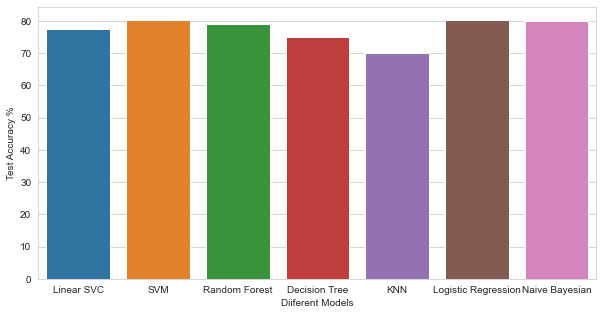

In [55]:
import seaborn as sns
model = ['Linear SVC', 'SVM', 'Random Forest','Decision Tree','KNN','Logistic Regression','Naive Bayesian']
acc = [model_acc_lsvc*100, model_acc_svc*100,model_acc_rf*100,model_acc_df*100,model_acc_knn*100,model_acc_lr*100,model_acc_nb*100 ]

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Test Accuracy %")
plt.xlabel("Diiferent Models")
sns.barplot(x= model, y= acc)
plt.show()

# TESTING A NEW DATASET

In [56]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,happen terribl car crash
1,2,NaN,NaN,heard earthquak differ citi stay safe everyon
2,3,NaN,NaN,forest fire spot pond gees flee across street ...
3,9,NaN,NaN,apocalyps light spokan wildfir
4,11,NaN,NaN,typhoon soudelor kill china taiwan


In [57]:
test.text.head()

0                             happen terribl car crash
1        heard earthquak differ citi stay safe everyon
2    forest fire spot pond gees flee across street ...
3                       apocalyps light spokan wildfir
4                   typhoon soudelor kill china taiwan
Name: text, dtype: object

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
train_vec = vectorizer.fit_transform(train.text)
vector_test = vectorizer.transform(test.text)

In [59]:
final_model = LogisticRegression()
final_model.fit(train_vec, train.target)
model_pred = final_model.predict(vector_test)

In [60]:
final = pd.DataFrame()
final['Id'] = test.id
final['target'] = model_pred

In [61]:
final.head(50)

,Id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
5,12,1
6,21,0
7,22,0
8,27,0
9,29,0
